### CAPSTONE PROJECT 1

### LIBRARIES :

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.base import clone
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from sklearn.inspection import permutation_importance

### READ THE DATASET :

In [6]:
df = pd.read_csv('space_missions_dataset.csv')
df.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


In [7]:
df.tail()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
495,MSN-0496,Mission-496,2034-06-28,Planet,Betelgeuse,Colonization,48.26,25.3,274.82,91.2,64,96.2,4837.16,44.97,Ariane 6
496,MSN-0497,Mission-497,2034-07-05,Asteroid,Betelgeuse,Exploration,0.35,4.1,379.71,82.6,61,100.0,62.59,67.88,SLS
497,MSN-0498,Mission-498,2034-07-12,Planet,Ceres,Exploration,47.60,26.6,296.45,98.6,29,100.0,4794.01,51.38,Falcon Heavy
498,MSN-0499,Mission-499,2034-07-19,Planet,Betelgeuse,Research,31.99,18.0,457.38,77.9,39,100.0,3102.16,86.28,SLS
499,MSN-0500,Mission-500,2034-07-26,Planet,Io,Exploration,43.41,23.5,449.40,45.4,88,100.0,4302.93,86.74,Falcon Heavy


### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

In [10]:
df.isnull().sum()

Mission ID                           0
Mission Name                         0
Launch Date                          0
Target Type                          0
Target Name                          0
Mission Type                         0
Distance from Earth (light-years)    0
Mission Duration (years)             0
Mission Cost (billion USD)           0
Scientific Yield (points)            0
Crew Size                            0
Mission Success (%)                  0
Fuel Consumption (tons)              0
Payload Weight (tons)                0
Launch Vehicle                       0
dtype: int64

### DROPPING UNNECESSARY COLUMNS

In [12]:
def clean_data(df):
    df.drop(columns=['Mission ID', 'Launch Date', 'Target Name', 
                     'Fuel Consumption (tons)', 'Payload Weight (tons)', 
                     'Launch Vehicle'], inplace=True)
    return df

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(500, 15)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance from Earth (light-years),500.0,25.48306,14.942128,0.35,11.7500,26.185,38.5700,49.90
Mission Duration (years),500.0,15.73680,7.578316,1.40,8.9000,16.400,22.2000,29.50
Mission Cost (billion USD),500.0,277.30028,141.137422,13.32,149.9600,282.170,399.9950,538.32
Scientific Yield (points),500.0,55.22340,26.446232,10.00,33.7750,54.400,79.0250,99.80
Crew Size,500.0,50.11800,27.660989,1.00,27.0000,50.000,74.0000,99.00
Mission Success (%),500.0,92.61660,9.391094,66.00,85.5000,98.600,100.0000,100.00
Fuel Consumption (tons),500.0,2543.52214,1492.964489,18.06,1177.3150,2597.985,3859.3550,5018.60
Payload Weight (tons),500.0,50.35562,28.227546,1.02,25.5675,50.995,74.4825,99.78


In [16]:
df.columns

Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Distance from Earth (light-years)',
       'Mission Duration (years)', 'Mission Cost (billion USD)',
       'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)',
       'Fuel Consumption (tons)', 'Payload Weight (tons)', 'Launch Vehicle'],
      dtype='object')

In [17]:
df.nunique()

Mission ID                           500
Mission Name                         500
Launch Date                          500
Target Type                            5
Target Name                            7
Mission Type                           4
Distance from Earth (light-years)    473
Mission Duration (years)             231
Mission Cost (billion USD)           499
Scientific Yield (points)            393
Crew Size                             99
Mission Success (%)                  184
Fuel Consumption (tons)              500
Payload Weight (tons)                487
Launch Vehicle                         4
dtype: int64

### CATEGORICAL AND NUMERICAL COLUMNS

In [19]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("----------------------------------")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Launch Vehicle'],
      dtype='object')
----------------------------------
Numerical Variables:
['Distance from Earth (light-years)', 'Mission Duration (years)', 'Mission Cost (billion USD)', 'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)', 'Fuel Consumption (tons)', 'Payload Weight (tons)']


In [20]:
df.dtypes

Mission ID                            object
Mission Name                          object
Launch Date                           object
Target Type                           object
Target Name                           object
Mission Type                          object
Distance from Earth (light-years)    float64
Mission Duration (years)             float64
Mission Cost (billion USD)           float64
Scientific Yield (points)            float64
Crew Size                              int64
Mission Success (%)                  float64
Fuel Consumption (tons)              float64
Payload Weight (tons)                float64
Launch Vehicle                        object
dtype: object

### COLUMNS WITH A STANDARD DEVIATION

In [22]:
std_values = df[num_cols].std()
std_values

Distance from Earth (light-years)      14.942128
Mission Duration (years)                7.578316
Mission Cost (billion USD)            141.137422
Scientific Yield (points)              26.446232
Crew Size                              27.660989
Mission Success (%)                     9.391094
Fuel Consumption (tons)              1492.964489
Payload Weight (tons)                  28.227546
dtype: float64

### MIN-MAX VALUES

In [24]:
for col in df.select_dtypes(include=np.number).columns:
    print(f'{col}: Min = {df[col].min()}, Max = {df[col].max()}')

Distance from Earth (light-years): Min = 0.35, Max = 49.9
Mission Duration (years): Min = 1.4, Max = 29.5
Mission Cost (billion USD): Min = 13.32, Max = 538.32
Scientific Yield (points): Min = 10.0, Max = 99.8
Crew Size: Min = 1, Max = 99
Mission Success (%): Min = 66.0, Max = 100.0
Fuel Consumption (tons): Min = 18.06, Max = 5018.6
Payload Weight (tons): Min = 1.02, Max = 99.78


### OUTLIERS WERE DETECTED AND REMOVED BASED ON THE INTERQUARTILE RANGE (IQR) METHOD TO ENSURE ROBUST MODEL PERFORMANCE

In [26]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

### ANALYSIS OF TARGET VARIABLES

count    500.000000
mean      92.616600
std        9.391094
min       66.000000
25%       85.500000
50%       98.600000
75%      100.000000
max      100.000000
Name: Mission Success (%), dtype: float64


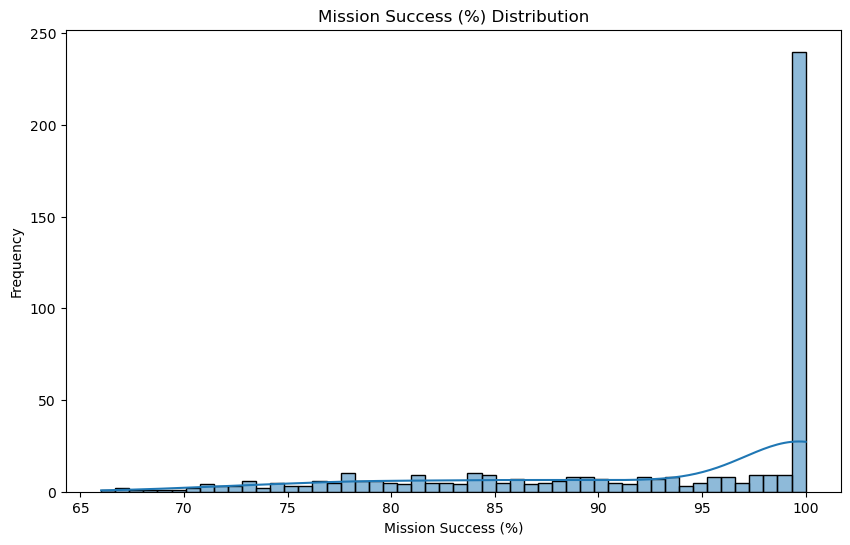

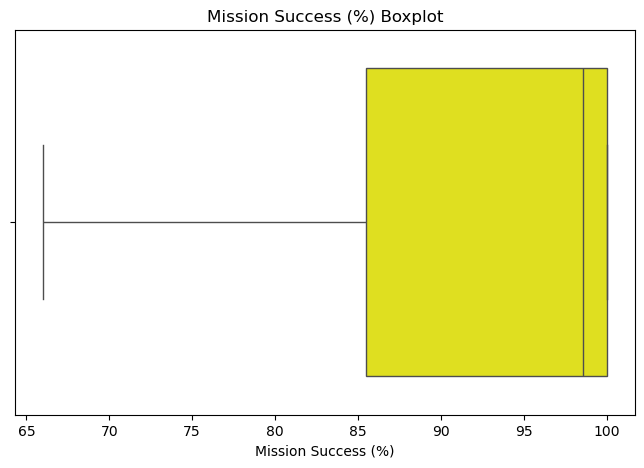

In [28]:
print(df['Mission Success (%)'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Mission Success (%)'], bins=50, kde=True)
plt.title("Mission Success (%) Distribution")
plt.xlabel("Mission Success (%)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Mission Success (%)'], color='yellow')
plt.title("Mission Success (%) Boxplot")
plt.xlabel("Mission Success (%)")
plt.show()

### HISTOGRAMS AND BOXPLOTS

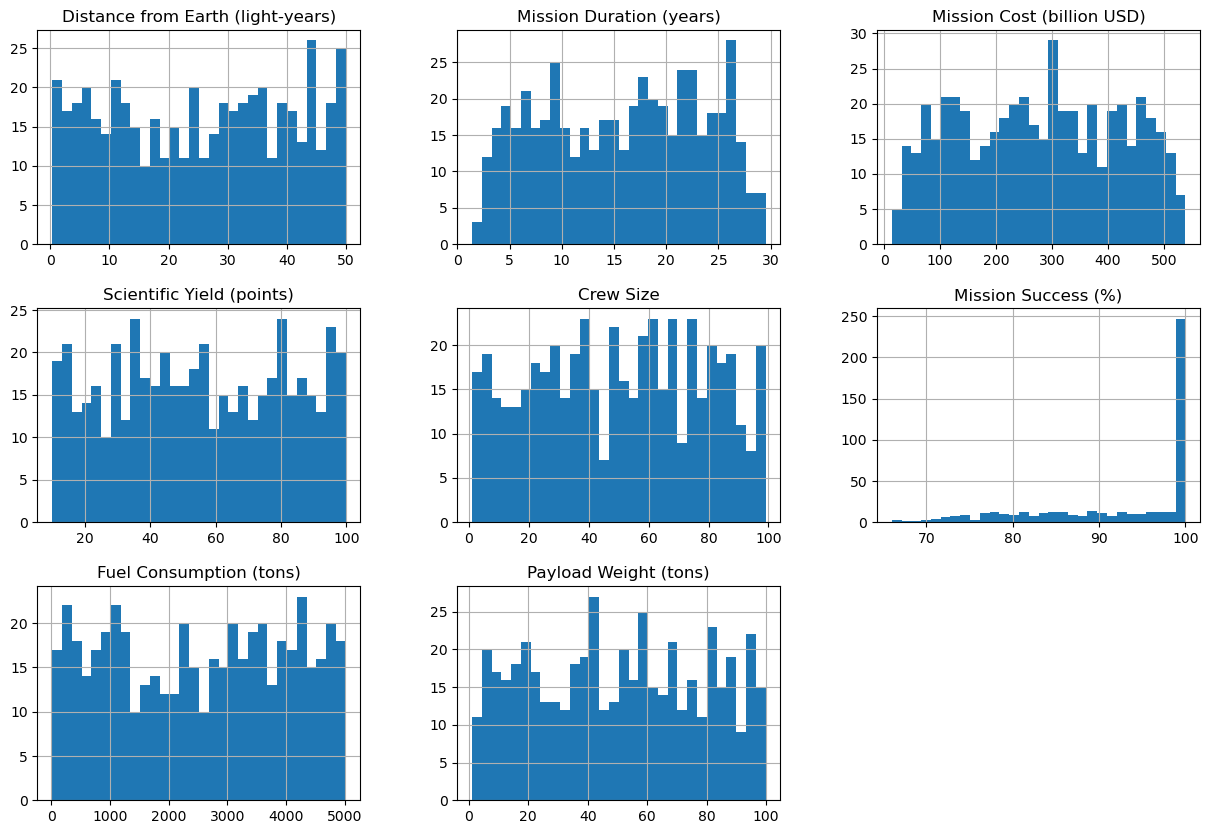

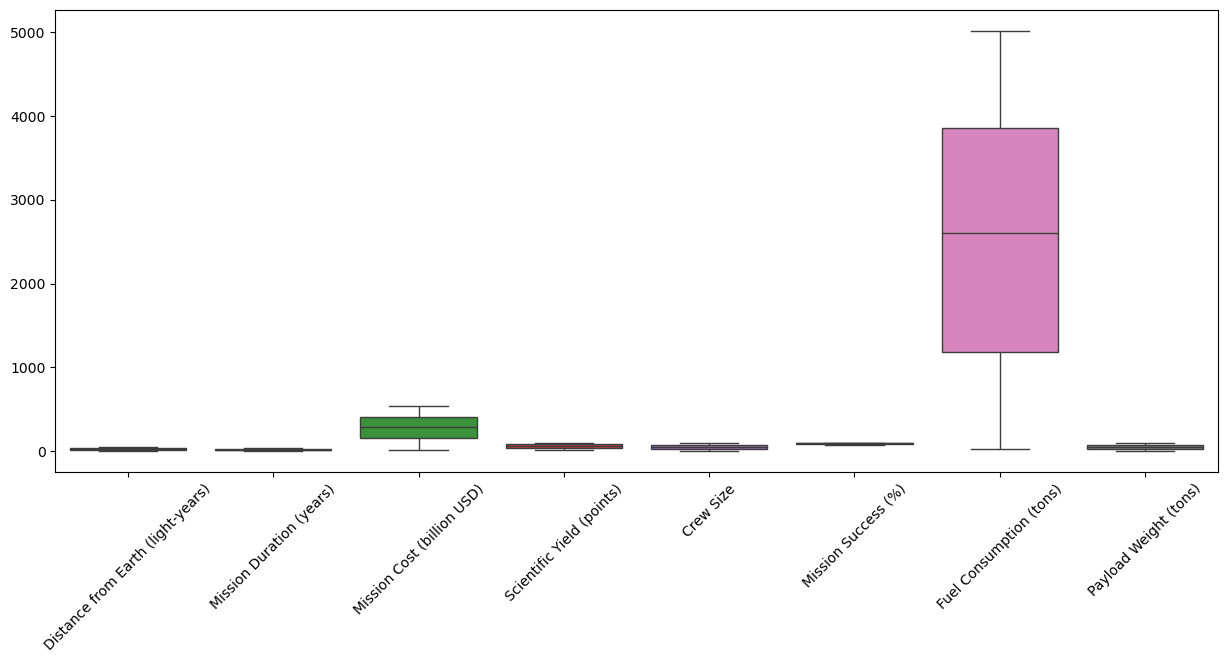

In [30]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.show()

### DISTRIBUTIONS OF NUMERICAL COLUMNS USING HISTOGRAMS

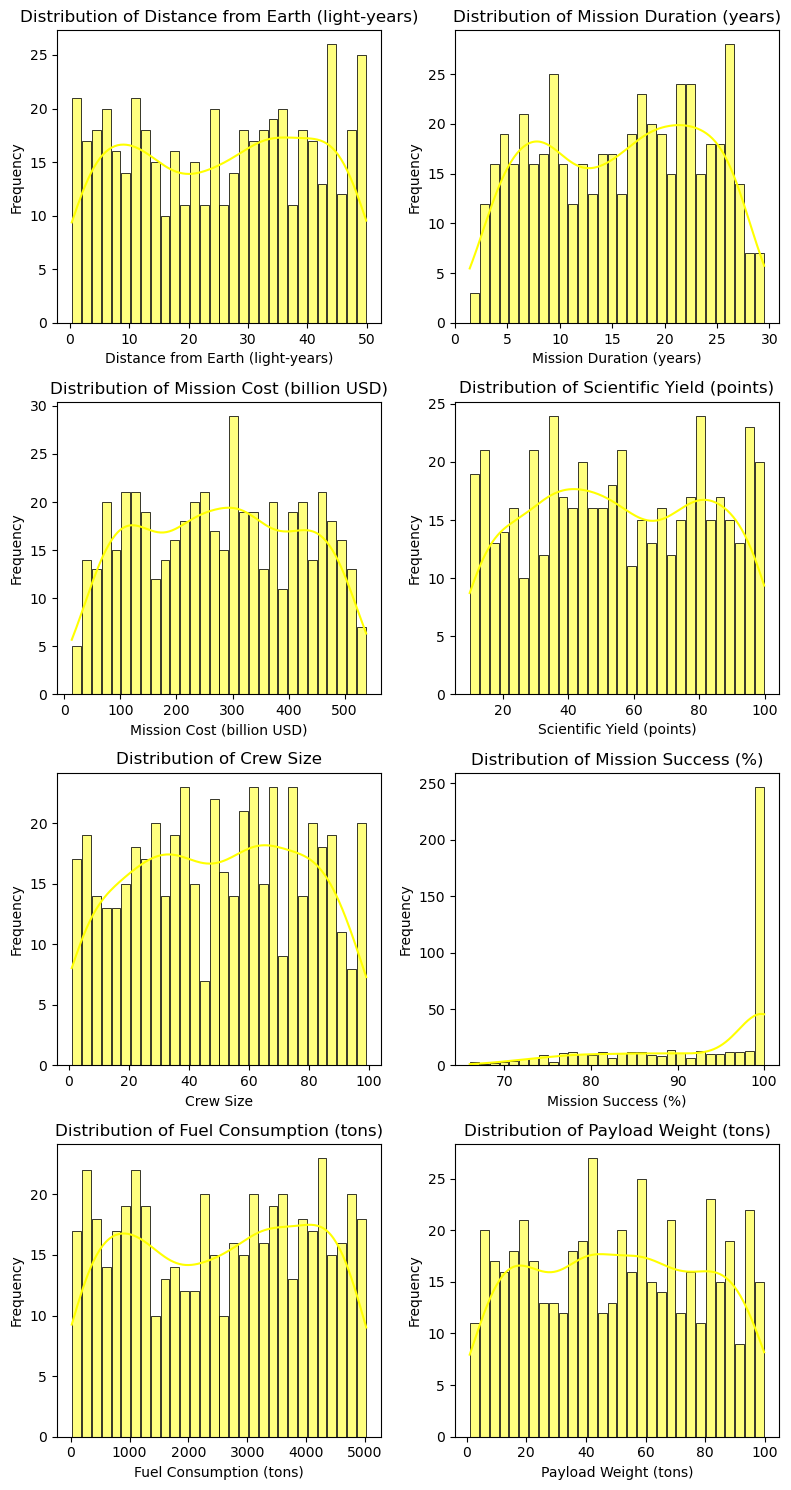

In [32]:
col_with_no_std = df.select_dtypes(include=np.number).columns.tolist()

num_cols = len(col_with_no_std)

fig, axes = plt.subplots(nrows=(num_cols // 2) + (num_cols % 2), ncols=2, figsize=(8, (num_cols // 2 + 1) * 3))

axes = axes.flatten()

for i, col in enumerate(col_with_no_std):
    sns.histplot(df[col], kde=True, ax=axes[i], color='yellow', bins=30, shrink=0.9)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### CORRELATION MATRIX USING A HEATMAP

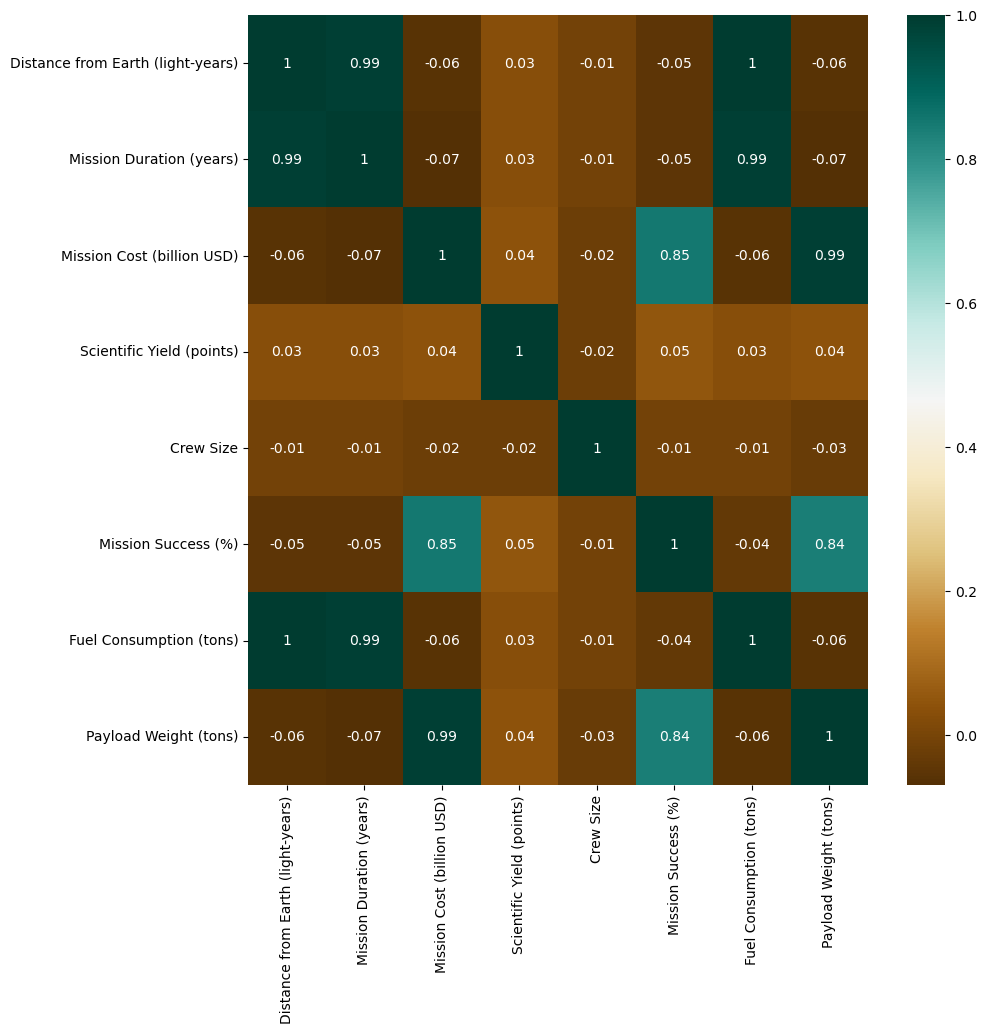

In [34]:
correlation_matrix = df[col_with_no_std].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True)
plt.show()

### DISTRIBUTION OF TARGET TYPE USING A PIE CHART

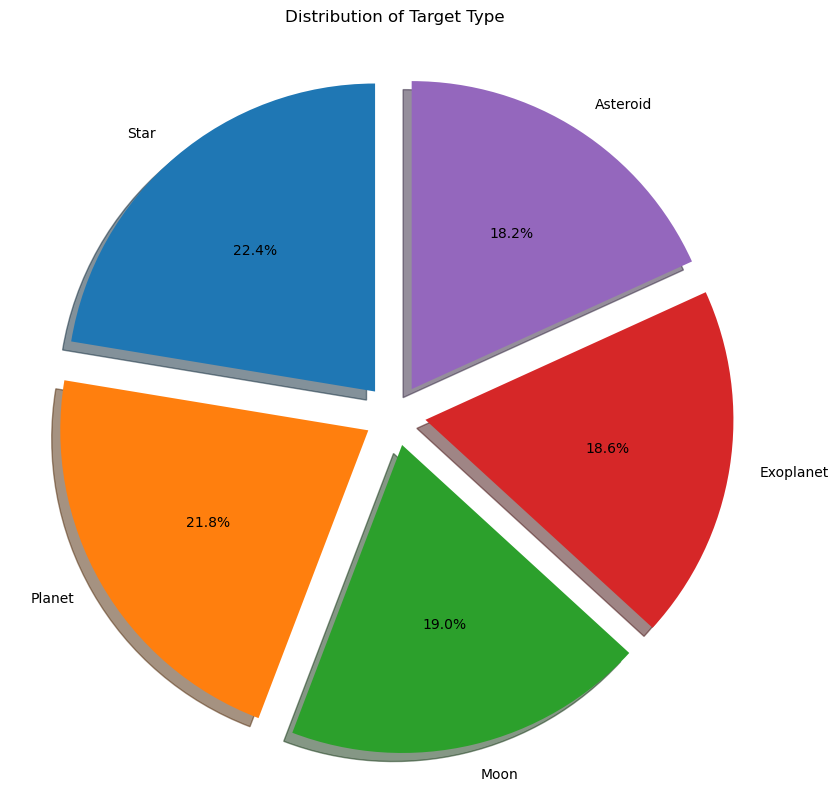

In [36]:
data = df['Target Type'].value_counts()
explode = (0.1,) * len(data) 

plt.figure(figsize=(10, 10))
data.plot(kind='pie', autopct="%0.1f%%", explode=explode, labels=data.index, startangle=90, shadow=True)
plt.title('Distribution of Target Type')
plt.ylabel('')
plt.show()

### BAR PLOT

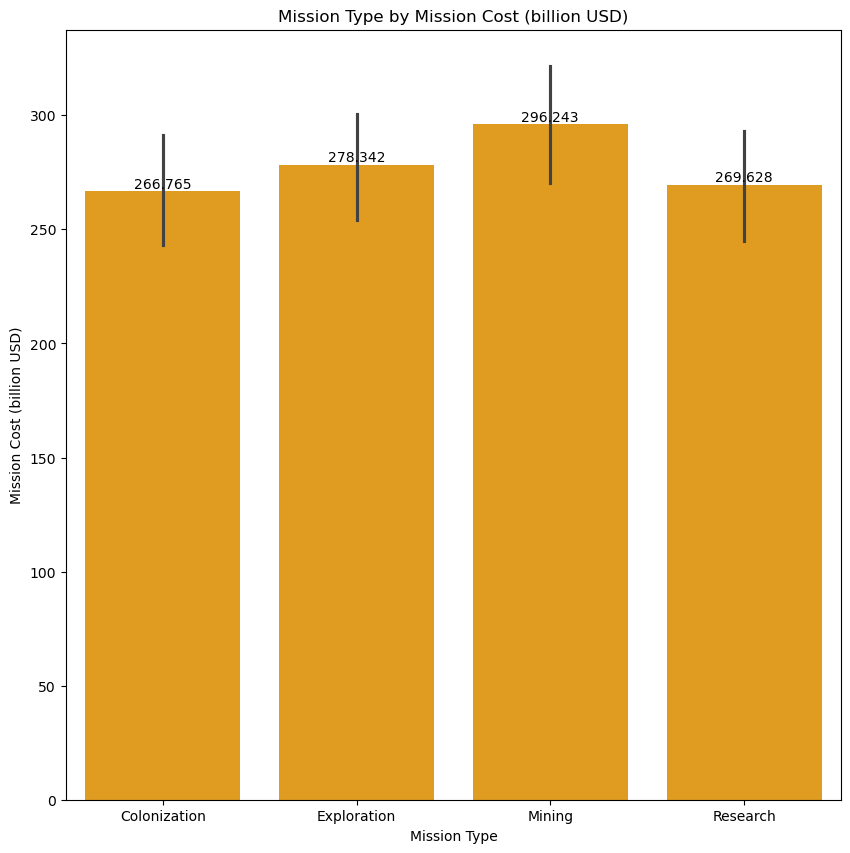

In [38]:
plt.figure(figsize=(10, 10))
y = sns.barplot(data=df, x='Mission Type', y='Mission Cost (billion USD)', color='orange')
y.bar_label(y.containers[0])
plt.title('Mission Type by Mission Cost (billion USD)')
plt.xlabel('Mission Type')
plt.ylabel('Mission Cost (billion USD)')
plt.show()

### SEABORN COUNTPLOT

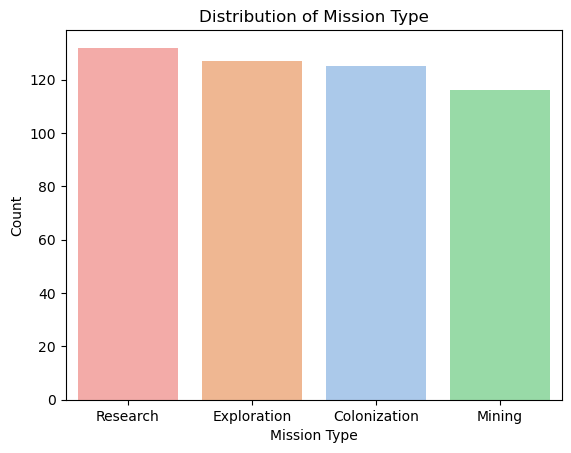

In [40]:
sns.countplot(
    x='Mission Type',
    data=df,
    hue='Mission Type',
    palette='pastel',
    order=df['Mission Type'].value_counts().index,
    legend=False
)
plt.title('Distribution of Mission Type')
plt.xlabel('Mission Type')
plt.ylabel('Count')
plt.show()

### SCATTER PLOT

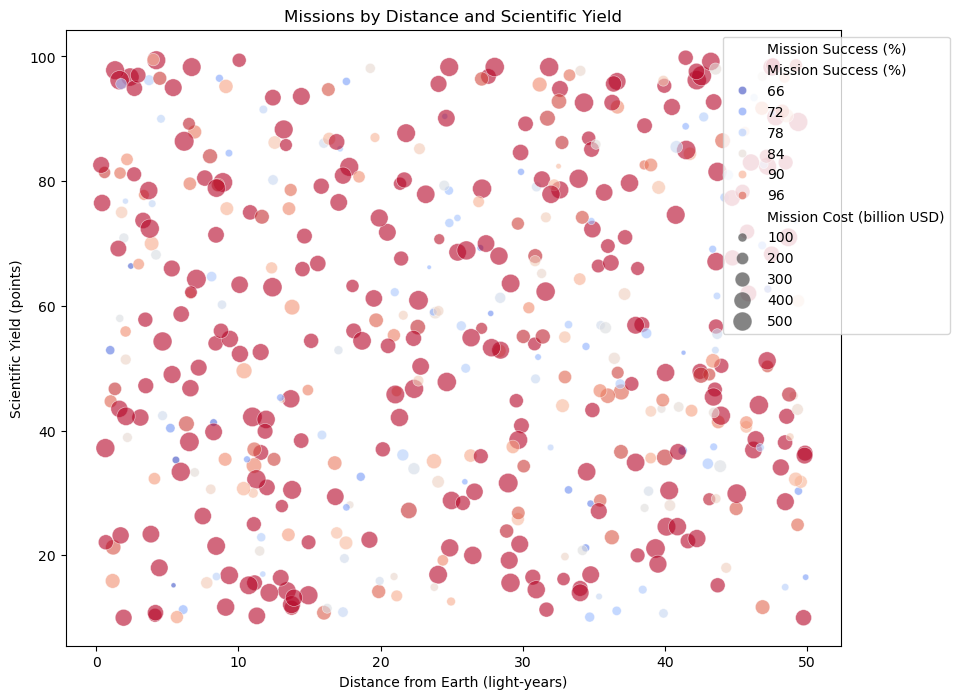

In [42]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df,
    x='Distance from Earth (light-years)',
    y='Scientific Yield (points)',
    hue='Mission Success (%)',
    palette='coolwarm',
    size='Mission Cost (billion USD)',
    sizes=(10, 200),
    alpha=0.6
)

plt.title('Missions by Distance and Scientific Yield')
plt.xlabel('Distance from Earth (light-years)')
plt.ylabel('Scientific Yield (points)')

plt.legend(title='Mission Success (%)', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

### TOP 10 MOST FREQUENT MISSION NAMES USING A BAR CHART

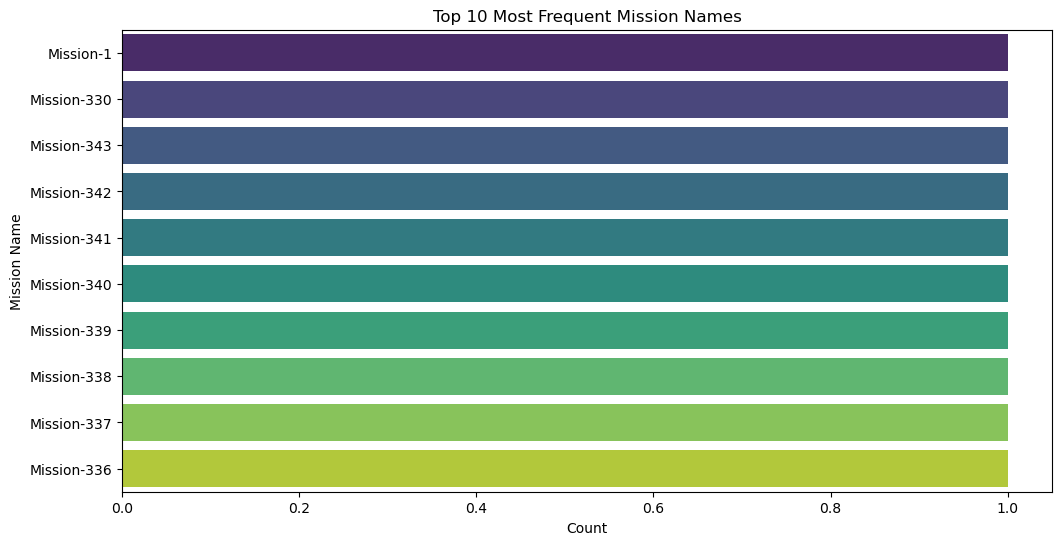

In [44]:
top_mission_names = df['Mission Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_mission_names.values,
    y=top_mission_names.index,
    palette='viridis',
    hue=top_mission_names.index,
    dodge=False
)

plt.title('Top 10 Most Frequent Mission Names')
plt.xlabel('Count')
plt.ylabel('Mission Name')
plt.legend([],[], frameon=False)
plt.show()

### FEATURE IMPORTANCE

In [46]:
def calculate_feature_importances(X, y):
    model = LinearRegression()
    model.fit(X, y)
    importances = pd.Series(model.coef_, index=X.columns)
    print("\nFeature Importances (Linear Regression):")
    print(importances)
    return importances

In [47]:
X = df[['Distance from Earth (light-years)', 'Mission Duration (years)', 
        'Mission Cost (billion USD)', 'Scientific Yield (points)', 'Crew Size']]
y = df['Mission Success (%)']

feature_importances = calculate_feature_importances(X, y)


Feature Importances (Linear Regression):
Distance from Earth (light-years)   -0.059390
Mission Duration (years)             0.125282
Mission Cost (billion USD)           0.056529
Scientific Yield (points)            0.007989
Crew Size                            0.002282
dtype: float64


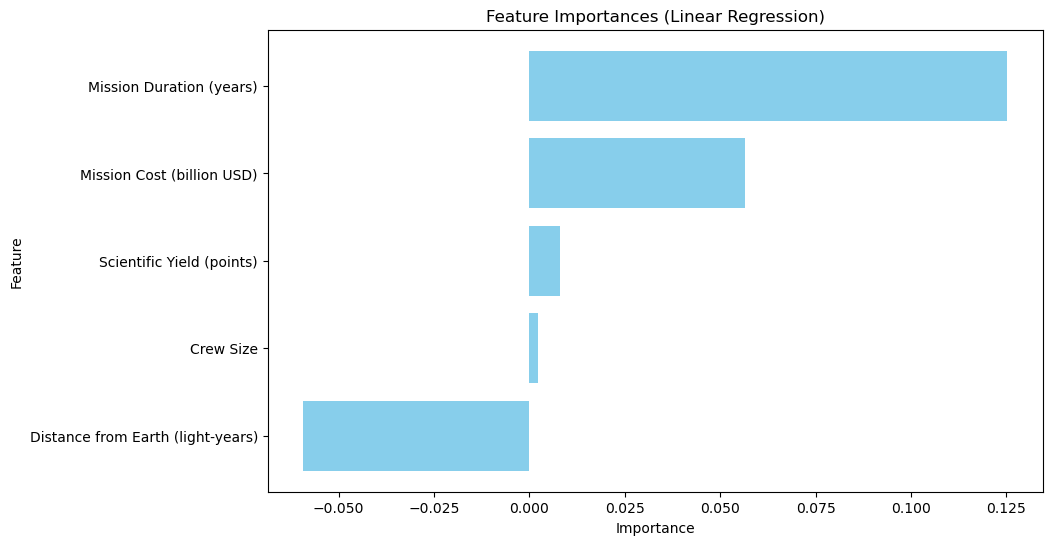

In [48]:
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()

### FEATURE IMPORTANCE SCORES FROM MODEL AND VIA RFE

In [50]:
def calculate_rfe_importances(X, y):
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=1, verbose=0)
    rfe.fit(X, y)
    importances = pd.DataFrame({
        'Feature': X.columns,
        'RFE Importance': 1 / rfe.ranking_
    }).sort_values(by='RFE Importance', ascending=False)
    return importances

In [51]:
rfe_importances = calculate_rfe_importances(X, y)
print(rfe_importances)

                             Feature  RFE Importance
1           Mission Duration (years)        1.000000
0  Distance from Earth (light-years)        0.500000
2         Mission Cost (billion USD)        0.333333
3          Scientific Yield (points)        0.250000
4                          Crew Size        0.200000


In [52]:
def ranking(ranks, names, order=1):
    return sorted(zip(ranks, names), reverse=order == -1)
    
lr = LinearRegression()

rfe = RFE(estimator=lr, n_features_to_select=1, verbose=3)
rfe.fit(X, y)

ranks = {}
ranks["RFE_LR"] = ranking(list(map(float, rfe.ranking_)), X.columns, order=-1)

print("\nRFE Rankings:")
for rank, feature in ranks["RFE_LR"]:
    print(f"Feature: {feature}, Rank: {rank}")

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.

RFE Rankings:
Feature: Crew Size, Rank: 5.0
Feature: Scientific Yield (points), Rank: 4.0
Feature: Mission Cost (billion USD), Rank: 3.0
Feature: Distance from Earth (light-years), Rank: 2.0
Feature: Mission Duration (years), Rank: 1.0


### PERMUTABLE FEATURE IMPORTANCE

In [54]:
def get_permutation_importance(X, y, model):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=0)
    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Permutation Importance (Mean)': result.importances_mean,
        'Permutation Importance (Std Dev)': result.importances_std
    })
    return result_df

In [55]:
lr.fit(X, y)
permutate_df = get_permutation_importance(X, y, lr)

sorted_permutate_df = permutate_df.sort_values('Permutation Importance (Mean)', ascending=False)
print(sorted_permutate_df[['Feature', 'Permutation Importance (Mean)']].head(20))

                             Feature  Permutation Importance (Mean)
2         Mission Cost (billion USD)                       1.443215
1           Mission Duration (years)                       0.022025
0  Distance from Earth (light-years)                       0.017278
3          Scientific Yield (points)                       0.000722
4                          Crew Size                      -0.000045


### DROP-COLUMN IMPORTANCE

In [57]:
def drop_col_feat_imp(model, X, y):
    model_clone = clone(model)
    model_clone.fit(X, y)
    benchmark_score = model_clone.score(X, y)

    importances = []
    for col in X.columns:
        model_clone = clone(model)
        model_clone.fit(X.drop(col, axis=1), y)
        drop_col_score = model_clone.score(X.drop(col, axis=1), y)
        importance = (benchmark_score - drop_col_score) / benchmark_score
        importances.append(importance)

    importances_df = pd.DataFrame({'Feature': X.columns, 'Drop-Column Importance': importances})
    return importances_df.sort_values(by='Drop-Column Importance', ascending=False)

In [58]:
model = LinearRegression()

drop_col_impt_df = drop_col_feat_imp(model, X, y)

print(drop_col_impt_df)

sorted_drop_col_impt_df = drop_col_impt_df.sort_values('Drop-Column Importance', ascending=False)
print(sorted_drop_col_impt_df[['Feature', 'Drop-Column Importance']].head(20))

                             Feature  Drop-Column Importance
2         Mission Cost (billion USD)                0.991639
3          Scientific Yield (points)                0.000699
1           Mission Duration (years)                0.000332
0  Distance from Earth (light-years)                0.000290
4                          Crew Size                0.000062
                             Feature  Drop-Column Importance
2         Mission Cost (billion USD)                0.991639
3          Scientific Yield (points)                0.000699
1           Mission Duration (years)                0.000332
0  Distance from Earth (light-years)                0.000290
4                          Crew Size                0.000062


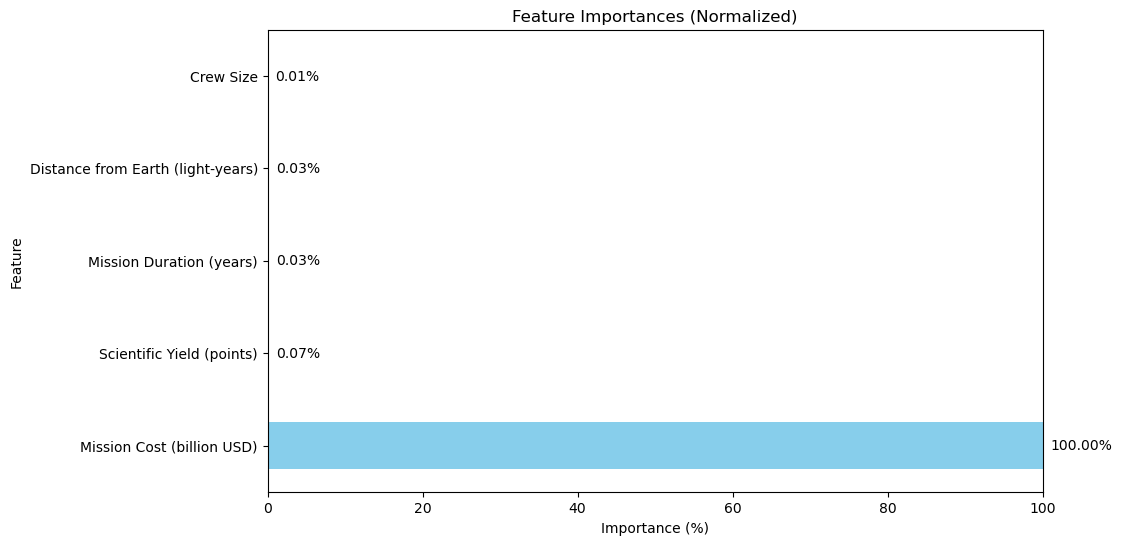

In [59]:
importances = drop_col_impt_df.set_index('Feature')['Drop-Column Importance']

importances = importances / importances.max() * 100

def plot_feature_importances(importances):
    plt.figure(figsize=(10, 6))
    ax = importances.sort_values().plot(kind='barh', color='skyblue')
    for i, v in enumerate(importances.sort_values()):
        plt.text(v + 1, i, f"{v:.2f}%", va='center') 
    plt.xlabel("Importance (%)")
    plt.ylabel("Feature")
    plt.title("Feature Importances (Normalized)")
    plt.gca().invert_yaxis()
    plt.xlim(left=0, right=100)
    plt.show()

plot_feature_importances(importances)

### MERGING FEATURE IMPORTANCE METRICS INTO A SINGLE RESULT DATAFRAME

In [61]:
!pip install tabulate

In [62]:
from tabulate import tabulate

all_ranks = pd.merge(
    drop_col_impt_df[['Feature', 'Drop-Column Importance']],
    permutate_df[['Feature', 'Permutation Importance (Mean)']],
    on='Feature'
)

all_ranks = pd.merge(
    all_ranks,
    rfe_importances[['Feature', 'RFE Importance']],
    on='Feature'
)

all_ranks['mean_feature_importance'] = (
    all_ranks['Drop-Column Importance'] +
    all_ranks['Permutation Importance (Mean)'] +
    all_ranks['RFE Importance']
) / 3

all_ranks = all_ranks.sort_values(by='mean_feature_importance', ascending=False).head(10)

print(tabulate(all_ranks.reset_index(drop=True), headers='keys', tablefmt='pretty'))

+---+-----------------------------------+------------------------+-------------------------------+--------------------+-------------------------+
|   |              Feature              | Drop-Column Importance | Permutation Importance (Mean) |   RFE Importance   | mean_feature_importance |
+---+-----------------------------------+------------------------+-------------------------------+--------------------+-------------------------+
| 0 |    Mission Cost (billion USD)     |   0.9916388665808161   |       1.443214788707429       | 0.3333333333333333 |   0.9227289962071928    |
| 1 |     Mission Duration (years)      | 0.0003316332379549184  |     0.022025390551920855      |        1.0         |   0.3407856745966253    |
| 2 | Distance from Earth (light-years) | 0.00029001868245632465 |     0.017278033063732268      |        0.5         |   0.17252268391539619   |
| 3 |     Scientific Yield (points)     | 0.0006991346331182363  |     0.0007219283747761484     |        0.25        |   0.

### CONCLUSION 
Among the analyzed features, "Mission Cost (billion USD)" consistently stands out as the most influential factor in predicting mission success across all evaluation methods, 
including Linear Regression coefficients, Recursive Feature Elimination (RFE), Permutation Importance, and Drop-Column Importance. 
Other features, such as "Mission Duration (years)" and "Distance from Earth (light-years)," show varying levels of importance, 
but their impact is significantly smaller compared to mission cost.

### TRAIN/VALIDATION/TEST SPLIT

In [65]:
df_temp, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_temp, test_size=0.25, random_state=1)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

target_train = df_train['Mission Success (%)'].values
target_validation = df_val['Mission Success (%)'].values
target_test = df_test['Mission Success (%)'].values

df_train.drop(columns=['Mission Success (%)'], inplace=True)
df_val.drop(columns=['Mission Success (%)'], inplace=True)
df_test.drop(columns=['Mission Success (%)'], inplace=True)

print(f"Training set shape: {df_train.shape}, Target shape: {target_train.shape}")
print(f"Validation set shape: {df_val.shape}, Target shape: {target_validation.shape}")
print(f"Test set shape: {df_test.shape}, Target shape: {target_test.shape}")

Training set shape: (300, 14), Target shape: (300,)
Validation set shape: (100, 14), Target shape: (100,)
Test set shape: (100, 14), Target shape: (100,)


### DICTVECTORIZER

In [67]:
vectorizer = DictVectorizer(sparse=True)

train_records = df_train.to_dict(orient='records')
X_train_vectorized = vectorizer.fit_transform(train_records)

validation_records = df_val.to_dict(orient='records')
X_validation_vectorized = vectorizer.transform(validation_records)

test_records = df_test.to_dict(orient='records')
X_test_vectorized = vectorizer.transform(test_records)

print(f"Shape of vectorized training data: {X_train_vectorized.shape}")
print(f"Shape of vectorized validation data: {X_validation_vectorized.shape}")
print(f"Shape of vectorized test data: {X_test_vectorized.shape}")

Shape of vectorized training data: (300, 927)
Shape of vectorized validation data: (100, 927)
Shape of vectorized test data: (100, 927)


### FUNCTION FOR EVALUATION METRICS

In [69]:
def evaluate_model(model, X_train_vectorized, target_train, 
                   X_validation_vectorized, target_validation, 
                   X_test_vectorized, target_test):
    
    train_predictions = model.predict(X_train_vectorized)
    val_predictions = model.predict(X_validation_vectorized)
    test_predictions = model.predict(X_test_vectorized)

    print("Training Set Evaluation:")
    rmse_train = np.sqrt(mean_squared_error(target_train, train_predictions))
    mae_train = mean_absolute_error(target_train, train_predictions)
    r2_train = r2_score(target_train, train_predictions)
    print(f'  RMSE: {rmse_train:.3f}')
    print(f'  MAE: {mae_train:.3f}')
    print(f'  R²: {r2_train:.3f}\n')

    print("Validation Set Evaluation:")
    rmse_val = np.sqrt(mean_squared_error(target_validation, val_predictions))
    mae_val = mean_absolute_error(target_validation, val_predictions)
    r2_val = r2_score(target_validation, val_predictions)
    print(f'  RMSE: {rmse_val:.3f}')
    print(f'  MAE: {mae_val:.3f}')
    print(f'  R²: {r2_val:.3f}\n')

    print("Test Set Evaluation:")
    rmse_test = np.sqrt(mean_squared_error(target_test, test_predictions))
    mae_test = mean_absolute_error(target_test, test_predictions)
    r2_test = r2_score(target_test, test_predictions)
    print(f'  RMSE: {rmse_test:.3f}')
    print(f'  MAE: {mae_test:.3f}')
    print(f'  R²: {r2_test:.3f}\n')

### DIMENSIONALITY REDUCTION AND MODEL TRAINING WITHOUT PARAMETER TUNING (PCA)

## Linear regression

In [72]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_vectorized.toarray())
X_validation_pca = pca.transform(X_validation_vectorized.toarray())
X_test_pca = pca.transform(X_test_vectorized.toarray())

linear_model = LinearRegression()
linear_model.fit(X_train_pca, target_train)

LinearRegression()

In [73]:
print("Linear Regression with PCA Evaluation:")
evaluate_model(
    linear_model, 
    X_train_pca, target_train, 
    X_validation_pca, target_validation, 
    X_test_pca, target_test
)

Linear Regression with PCA Evaluation:
Training Set Evaluation:
  RMSE: 5.023
  MAE: 4.061
  R²: 0.707

Validation Set Evaluation:
  RMSE: 5.018
  MAE: 3.940
  R²: 0.747

Test Set Evaluation:
  RMSE: 4.669
  MAE: 3.849
  R²: 0.725



### CONCLUSION
The linear regression model with PCA demonstrates consistent performance across training, validation, and test sets. The R² values (~0.70-0.75) indicate that the model explains a significant portion of the variance, with moderate prediction errors (RMSE ~4.6-5.0, MAE ~3.8-4.0). 
While effective, more advanced models or optimization can improve performance.

### RIDGE REGRESSION WITH GRID SEARCH FOR HYPERPARAMETER TUNING

In [76]:
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train_vectorized, target_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             scoring='r2')

In [77]:
print(f"Best Ridge Parameters: {ridge_grid.best_params_}")

best_ridge_model = ridge_grid.best_estimator_

print("Best Ridge Regression Model Evaluation:")
evaluate_model(
    best_ridge_model, 
    X_train_vectorized, target_train, 
    X_validation_vectorized, target_validation, 
    X_test_vectorized, target_test
)

Best Ridge Parameters: {'alpha': 1000.0}
Best Ridge Regression Model Evaluation:
Training Set Evaluation:
  RMSE: 5.031
  MAE: 4.080
  R²: 0.706

Validation Set Evaluation:
  RMSE: 4.974
  MAE: 3.902
  R²: 0.751

Test Set Evaluation:
  RMSE: 4.654
  MAE: 3.840
  R²: 0.727



### CONCLUSION
The Ridge Regression model with the best parameter (alpha = 1000.0) demonstrates balanced performance across all datasets. It achieves an R² of 0.706 on the training set, 0.751 on the validation set, and 0.727 on the test set, indicating good generalization with consistent prediction accuracy. 
While the model performs well, further optimization or advanced modeling may enhance results.

### OPTIMIZATION OF LASSO REGRESSION HYPERPARAMETERS USING GRIDSEARCHCV

In [80]:
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train_vectorized, target_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.73022628184782, tolerance: 2.0203676625000004
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219.9064550335722, tolerance: 2.0914766499999997
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.79978960760013, tolerance: 1.9344566625000001
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='r2')

In [81]:
print(f"Best Lasso Parameters: {lasso_grid.best_params_}")

best_lasso_model = lasso_grid.best_estimator_

print("Best Lasso Regression Model Evaluation:")
evaluate_model(
    best_lasso_model, 
    X_train_vectorized, target_train, 
    X_validation_vectorized, target_validation, 
    X_test_vectorized, target_test
)

Best Lasso Parameters: {'alpha': 10.0}
Best Lasso Regression Model Evaluation:
Training Set Evaluation:
  RMSE: 5.077
  MAE: 4.127
  R²: 0.701

Validation Set Evaluation:
  RMSE: 4.943
  MAE: 3.875
  R²: 0.754

Test Set Evaluation:
  RMSE: 4.665
  MAE: 3.859
  R²: 0.726



### CONCLUSION
The Lasso regression model with the optimized alpha value of 10.0 demonstrates balanced performance across training, validation, and test sets. While the training R² indicates a moderate fit (0.701), the validation and test R² values (0.754 and 0.726) highlight the model's ability to generalize well to unseen data. 
This suggests that the chosen alpha effectively controls overfitting while maintaining prediction accuracy.

### DECISION TREE REGRESSOR

In [84]:
dt_model = DecisionTreeRegressor(
    max_depth=5,              
    min_samples_split=10,     
    min_samples_leaf=5,    
    random_state=42          
)
dt_model.fit(X_train_vectorized, target_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [85]:
print("Decision Tree Model Evaluation:")
evaluate_model(
    dt_model, 
    X_train_vectorized, target_train, 
    X_validation_vectorized, target_validation, 
    X_test_vectorized, target_test
)

Decision Tree Model Evaluation:
Training Set Evaluation:
  RMSE: 2.706
  MAE: 1.691
  R²: 0.915

Validation Set Evaluation:
  RMSE: 5.097
  MAE: 3.218
  R²: 0.739

Test Set Evaluation:
  RMSE: 4.238
  MAE: 2.654
  R²: 0.774



### CONCLUSION
The Decision Tree model demonstrates strong performance on the training set with an R² of 0.915, indicating a good fit to the data. 
However, the decrease in R² for the validation (0.739) and test (0.774) sets highlights a slight overfitting tendency. 
Despite this, the model maintains reasonable generalization capabilities across unseen data, with acceptable RMSE and MAE values. 
Further optimization or regularization could improve the balance between training and validation performance.

### XGB REGRESSOR

In [88]:
xgb_model = XGBRegressor(
    n_estimators=20,        
    max_depth=5,           
    learning_rate=0.1,       
    subsample=0.8,          
    colsample_bytree=0.8,   
    reg_alpha=0.1,         
    reg_lambda=1.0,        
    random_state=42     
)
xgb_model.fit(X_train_vectorized, target_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
print("XGBoost Model Evaluation:")
evaluate_model(
    xgb_model, 
    X_train_vectorized, target_train, 
    X_validation_vectorized, target_validation, 
    X_test_vectorized, target_test
)

XGBoost Model Evaluation:
Training Set Evaluation:
  RMSE: 2.314
  MAE: 1.726
  R²: 0.938

Validation Set Evaluation:
  RMSE: 4.709
  MAE: 3.381
  R²: 0.777

Test Set Evaluation:
  RMSE: 3.666
  MAE: 2.637
  R²: 0.831



### CONCLUSION
The XGBoost model demonstrates strong predictive performance with an R² of 0.938 on the training set, indicating a well-fitted model. 
However, the validation (R² = 0.777) and test (R² = 0.831) results suggest some generalization challenges, likely due to mild overfitting. 
Further tuning regularization parameters or adjustments to the training process could enhance model performance on unseen data.

### RANDOM FOREST REGRESSOR

In [92]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectorized, target_train)

RandomForestRegressor(random_state=42)

In [93]:
print("Random Forest Model Evaluation:")
evaluate_model(
    rf_model, 
    X_train_vectorized, target_train, 
    X_validation_vectorized, target_validation, 
    X_test_vectorized, target_test
)

Random Forest Model Evaluation:
Training Set Evaluation:
  RMSE: 1.537
  MAE: 0.894
  R²: 0.973

Validation Set Evaluation:
  RMSE: 4.421
  MAE: 2.865
  R²: 0.804

Test Set Evaluation:
  RMSE: 3.393
  MAE: 2.037
  R²: 0.855



### CONCLUSION
The Random Forest Regressor demonstrates excellent performance with an R² of 0.973 on the training set, indicating a strong fit. The validation and test set results, with R² values of 0.804 and RMSE values of 4.421 and 3.393, respectively, highlight the model's ability to generalize well to unseen data. 
This balance suggests that the model effectively captures patterns in the data while avoiding overfitting.

### GRADIENT BOOSTING REGRESSOR

In [96]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_vectorized, target_train)

GradientBoostingRegressor(random_state=42)

In [97]:
print("Gradient Boosting Model Evaluation:")
evaluate_model(
    gb_model, 
    X_train_vectorized, target_train, 
    X_validation_vectorized, target_validation, 
    X_test_vectorized, target_test
)

Gradient Boosting Model Evaluation:
Training Set Evaluation:
  RMSE: 1.738
  MAE: 1.258
  R²: 0.965

Validation Set Evaluation:
  RMSE: 4.281
  MAE: 2.853
  R²: 0.816

Test Set Evaluation:
  RMSE: 3.296
  MAE: 2.115
  R²: 0.863



### CONCLUSION
The Gradient Boosting Regressor demonstrates strong performance, achieving high accuracy across all datasets. The model fits the training data well (R²: 0.965) and generalizes effectively to the validation (R²: 0.816) and test sets (R²: 0.863). 
This indicates the model captures complex patterns without significant overfitting.

### EVALUATION METRICS: RMSE, MAE, AND R²

In [100]:
model_predictions = {
    "Linear Regression": linear_model.predict(X_validation_pca),
    "Ridge Regression": best_ridge_model.predict(X_validation_vectorized),
    "Lasso Regression": best_lasso_model.predict(X_validation_vectorized),
    "Decision Tree": dt_model.predict(X_validation_vectorized),
    "Random Forest": rf_model.predict(X_validation_vectorized),
    "XGBoost": xgb_model.predict(X_validation_vectorized),
    "Gradient Boosting": gb_model.predict(X_validation_vectorized)
}

In [101]:
evaluation_results = {}
for model_name, predictions in model_predictions.items():
    metrics = {
        "RMSE": np.sqrt(mean_squared_error(target_validation, predictions)),
        "MAE": mean_absolute_error(target_validation, predictions),
        "R2": r2_score(target_validation, predictions)
    }
    evaluation_results[model_name] = metrics

In [102]:
model_metrics = {
    "Model": list(evaluation_results.keys()),
    "RMSE": [metrics["RMSE"] for metrics in evaluation_results.values()],
    "R2 Score": [metrics["R2"] for metrics in evaluation_results.values()],
    "MAE": [metrics["MAE"] for metrics in evaluation_results.values()]
}
metrics_df = pd.DataFrame(model_metrics)

metrics_df

,Model,RMSE,R2 Score,MAE
0,Linear Regression,5.018050,0.746838,3.940017
1,Ridge Regression,4.973625,0.751300,3.901738
2,Lasso Regression,4.943223,0.754331,3.875212
3,Decision Tree,5.096540,0.738856,3.217941
4,Random Forest,4.420864,0.803509,2.864930
5,XGBoost,4.708620,0.777097,3.381264
6,Gradient Boosting,4.281393,0.815711,2.852651


### CONCLUSION
The Gradient Boosting model demonstrates the best overall performance among all tested models, achieving the lowest RMSE (4.28) and MAE (2.85) with the highest R² score (0.81). 
This indicates that Gradient Boosting provides the most accurate predictions with minimal error and explains the majority of the variance in the target variable.
The Random Forest model also performs well, with an RMSE of 4.42 and an R² of 0.80, making it a strong alternative to Gradient Boosting.
Other models, such as Linear Regression, Ridge Regression, and Lasso Regression, show competitive performance but slightly higher errors, 
while the Decision Tree model exhibits lower errors but may overfit the data due to its nature. 
The XGBoost model had relatively weaker performance compared to Gradient Boosting and Random Forest, likely due to the specific hyperparameter settings used.

### MODEL PERFORMANCE COMPARSION

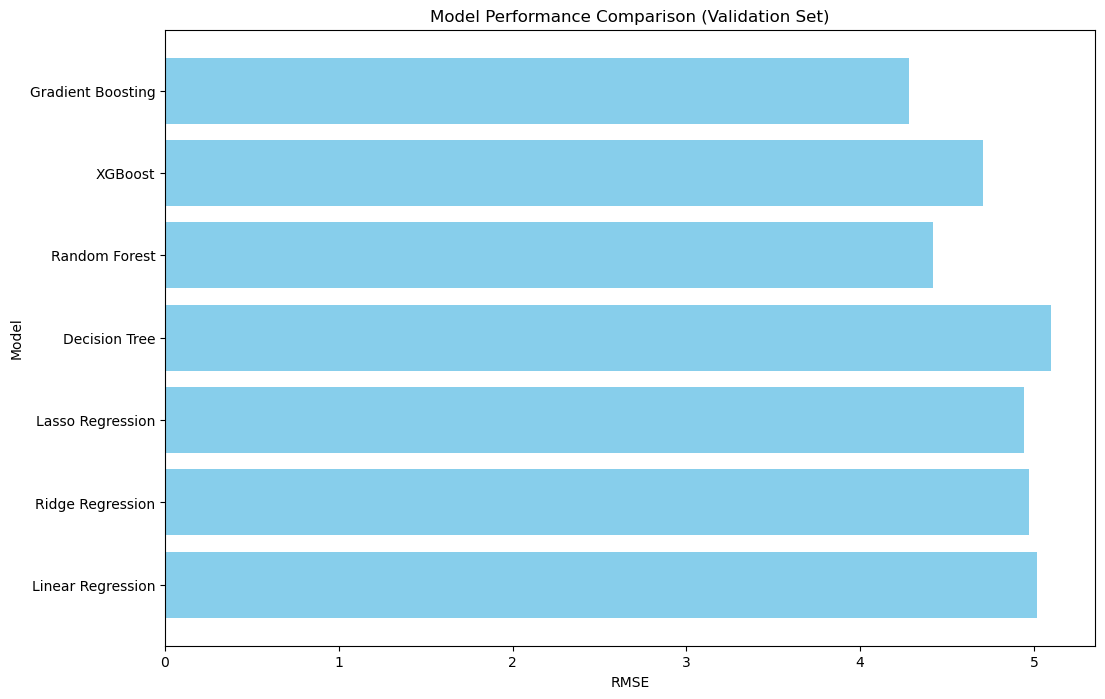

Test set shape: (100, 14), Target shape: (100,)


In [105]:
plt.figure(figsize=(12, 8))
plt.barh(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Performance Comparison (Validation Set)')
plt.show()

print(f"Test set shape: {df_test.shape}, Target shape: {target_test.shape}")

### TRAINING MULTIPLE VARIATIONS OF NEURAL NETWORKS WITH TUNED PARAMETERS

In [190]:
input_dim = X_train_vectorized.shape[1]

def build_model(hp):
    model = Sequential()
    
    model.add(Dense(units=hp.Int('units_layer1', min_value=64, max_value=512, step=64), activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_layer1', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(units=hp.Int('units_layer2', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_layer2', min_value=0.0, max_value=0.5, step=0.1)))
    
    if hp.Choice('add_layer3', [True, False]):
        model.add(Dense(units=hp.Int('units_layer3', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_layer3', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(1))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='mse',
        metrics=['mae']
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_mae',
    max_epochs=50,
    factor=2,
    directory='my_tuner_dir',
    project_name='nn_hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)

tuner.search(
    X_train_vectorized,
    target_train,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_vectorized,
    target_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

best_model.save('best_nn_model.h5')
print("Best model saved as 'best_nn_model.h5'")

test_loss, test_mae = best_model.evaluate(X_test_vectorized, target_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Reloading Tuner from my_tuner_dir\nn_hyperparameter_tuning\tuner0.json


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 498ms/step - loss: 8538.6357 - mae: 91.9670 - val_loss: 6759.6392 - val_mae: 81.6818
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 8372.8486 - mae: 91.1028 - val_loss: 6250.4243 - val_mae: 78.3207
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 8154.8569 - mae: 89.9246 - val_loss: 5690.5269 - val_mae: 74.2717
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 7809.7910 - mae: 87.9665 - val_loss: 5215.3115 - val_mae: 70.4696
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - loss: 7536.5347 - mae: 86.3844 - val_loss: 4690.4814 - val_mae: 65.8770
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - loss: 7193.6235 - mae: 84.3491 - val_loss: 4238.9995 - val_mae: 61.3269
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 7011.2861 - mae: 83.2818 - val_loss: 3868.5422 - val_mae: 56.9861
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 6530.5039 - mae: 80.3233 - val_loss: 3497.0698 - val_mae: 52.1092
Epoch 9

Best model saved as 'best_nn_model.h5'
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 42.4711 - mae: 5.4420
Test Loss: 39.2455, Test MAE: 5.2563


### CONCLUSION
The model's performance improved significantly throughout the training process, as indicated by the reduction in both training and validation loss. 
Despite initial instability and high validation error in early epochs, the model achieved a Test Loss of 39.2455 and a Test MAE of 5.2563. 
These results suggest that the model has learned to generalize reasonably well, though further tuning or adjustments to the architecture and hyperparameters might enhance stability and performance, particularly in the early epochs.

### EVALUATING OF NEURAL NETWORKS

In [193]:
def evaluate_nn_model(model, X, y):
    
    predictions = model.predict(X).flatten()
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R²: {r2:.3f}\n')
    
    return {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

In [195]:
nn_results = []

print('\nEvaluating Neural Network Model (Validation Set)')
val_metrics = evaluate_nn_model(best_model, X_validation_vectorized, target_validation)
nn_results.append({
    "Set": "Validation",
    "RMSE": val_metrics["RMSE"],
    "MAE": val_metrics["MAE"],
    "R2": val_metrics["R2"]
})

print('\nEvaluating Neural Network Model (Test Set)')
test_metrics = evaluate_nn_model(best_model, X_test_vectorized, target_test)
nn_results.append({
    "Set": "Test",
    "RMSE": test_metrics["RMSE"],
    "MAE": test_metrics["MAE"],
    "R2": test_metrics["R2"]
})

nn_results_df = pd.DataFrame(nn_results)
print(nn_results_df)


Evaluating Neural Network Model (Validation Set)
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step
RMSE: 8.509
MAE: 6.736
R²: 0.272


Evaluating Neural Network Model (Test Set)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
RMSE: 6.265
MAE: 5.256
R²: 0.505

          Set      RMSE       MAE        R2
0  Validation  8.509239  6.736230  0.272035
1        Test  6.264620  5.256283  0.505323


### CONCLUSION
The neural network model demonstrates moderate performance, with an R² of 0.272035 on the validation set and 0.505323 on the test set, indicating limited predictive capability. 
The RMSE and MAE values suggest the model has room for improvement, particularly in minimizing prediction errors. 
Further tuning of the model architecture, hyperparameters, or exploration of additional features might enhance its performance.

### NEURAL NETWORK PERFORMANCE COMPARSION

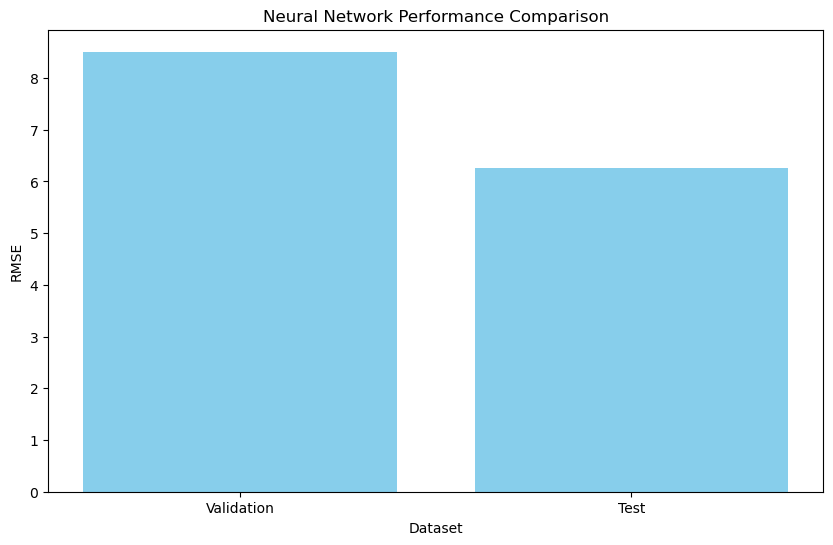

In [198]:
plt.figure(figsize=(10, 6))
plt.bar(nn_results_df['Set'], nn_results_df['RMSE'], color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('RMSE')
plt.title('Neural Network Performance Comparison')
plt.show()

In [200]:
!pip install flask

### SAVING PKL MODELS

In [228]:
from joblib import dump
dump(linear_model, 'linear_model.pkl')
dump(rf_model, 'random_forest_model.pkl')
dump(gb_model, 'gradient_boosting_model.pkl')
dump(best_ridge_model, 'ridge_regression_model.pkl')
dump(best_lasso_model, 'lasso_regression_model.pkl')
dump(xgb_model, 'xgboost_model.pkl')
dump(dt_model, 'decision_tree_model.pkl')
dump(vectorizer, 'dict_vectorizer.pkl')

['dict_vectorizer.pkl']

### SAVING H5 KERAS

In [222]:
best_model.save('best_nn_model.keras')

In [220]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.17.1
    Uninstalling tensorflow-intel-2.17.1:
      Successfully uninstalled tensorflow-intel-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1


  You can safely remove it manually.


### MAKING PREDICTIONS VIA FLASK API

In [230]:
import requests

url = "http://127.0.0.1:5000/predict"
data = {"features": [1.0, 2.0, 3.0, 4.0, 5.0]}

response = requests.post(url, json=data)
print(response.json())

{'neural_network_prediction': [95.8124771118164], 'random_forest_prediction': [70.96999999999996]}
